N BSR Cross Sections (Zatsarriny)
============================

In [1]:
from nepc.util import scraper
from nepc.util import config
import numpy as np
import pandas as pd
import tarfile
import matplotlib.pyplot as plt

In [2]:
NEPC_HOME = config.nepc_home()
outdir = NEPC_HOME + "/data/cs/n/zatsarinny/"
tmpdir = NEPC_HOME + "/tmp/"
arcdir = tmpdir + "/N_2014_archive/"
next_csdata_id = 1
next_cs_id = 1

In [3]:
scraper.rmdir(outdir)
scraper.mkdir(outdir)

In [4]:
scraper.rmdir(tmpdir)
scraper.mkdir(tmpdir)

Error: /Users/adamson/projects/nepc/tmp/ - No such file or directory.


In [5]:
# specifying the tar file name 
bsr_tarfile = NEPC_HOME + "/data/raw/bsr/N_2014_archive.tar.gz"
  
# check that it's a valid tar file
for file_name in [ bsr_tarfile ]:
    try:
        print(file_name, tarfile.is_tarfile(file_name))
    except (IOError, err):
        print(file_name, err)

/Users/adamson/projects/nepc/data/raw/bsr/N_2014_archive.tar.gz True


In [6]:
t = tarfile.open(bsr_tarfile, 'r')

# peek inside the tar file
print("First 10 files in " + bsr_tarfile + ": ")
print(t.getnames()[:10])

First 10 files in /Users/adamson/projects/nepc/data/raw/bsr/N_2014_archive.tar.gz: 
['N_2014_archive', 'N_2014_archive/2014_N.pdf', 'N_2014_archive/ion_001', 'N_2014_archive/ion_002', 'N_2014_archive/ion_003', 'N_2014_archive/mt_001', 'N_2014_archive/mt_002', 'N_2014_archive/mt_003', 'N_2014_archive/read_me', 'N_2014_archive/tr_001_001']


In [7]:
t.extractall(path=tmpdir)

Put all of the electronic states into a list. The states correspond to those in wang2014. (The (2s$^2$2p$^3$) ${}^4S^o$ ground state is item 0 in the list.)  There are six additional states in the dataset above and beyond those in the paper.

In [8]:
states_file = NEPC_HOME + "/data/states.tsv"
(states, states_long) = scraper.get_states(states_file)

In [9]:
n_states=states[28:55]
n_states_long=states_long[28:55]
np_states=states[1:5]
np_states_long=states_long[1:5]

In [10]:
n_states

['N_2s22p3_4So',
 'N_2s22p3_2Do',
 'N_2s22p3_2Po',
 'N_2s22p2_3P_3s_4P',
 'N_2s22p2_3P_3s_2P',
 'N_2s22p4_4P',
 'N_2s22p2_3P_3p_2So',
 'N_2s22p2_3P_3p_4Do',
 'N_2s22p2_3P_3p_4Po',
 'N_2s22p2_3P_3p_4So',
 'N_2s22p2_3P_3p_2Do',
 'N_2s22p2_3P_3p_2Po',
 'N_2s22p2_1D_3s_2D',
 'N_2s22p2_3P_4s_4P',
 'N_2s22p2_3P_4s_2P',
 'N_2s22p2_3P_3d_2P',
 'N_2s22p2_3P_3d_4F',
 'N_2s22p2_3P_3d_4P',
 'N_2s22p2_3P_3d_2F',
 'N_2s22p2_3P_3d_4D',
 'N_2s22p2_3P_3d_2D',
 'N_2s22p2_3P_4p_2So',
 'N_2s22p2_3P_4p_4Do',
 'N_2s22p2_3P_4p_4Po',
 'N_2s22p2_3P_4p_2Do',
 'N_2s22p2_3P_4p_4So',
 'N_2s22p2_3P_4p_2Po']

In [11]:
n_states_long

['N($2s^22p^3$ ${}^4\\text{S}^\\text{o}$)',
 'N($2s^22p^3 {}^2D^\\text{o}$)',
 'N($2s^22p^3 {}^2P^\\text{o}$)',
 'N($2s^22p^2$(${}^3P$)3s ${}^4P$)',
 'N($2s^22p^2$(${}^3P$)3s ${}^2P$)',
 'N($2s^22p^4$ ${}^4\\text{P}$)',
 'N($2s^22p^2$(${}^3\\text{P}$)3p ${}^2S^\\text{o}$)',
 'N($2s^22p^2$(${}^3\\text{P}$)3p ${}^4D^\\text{o}$)',
 'N($2s^22p^2$(${}^3\\text{P}$)3p ${}^4P^\\text{o}$)',
 'N($2s^22p^2$(${}^3P$)3p ${}^4S^\\text{o}$)',
 'N($2s^22p^2$(${}^3P$)3p ${}^2D^\\text{o}$)',
 'N($2s^22p^2$(${}^3P$)3p ${}^2P^\\text{o}$)',
 'N($2s^22p^2$(${}^1D$)3s ${}^2D$)',
 'N($2s^22p^2$(${}^3P$)4s ${}^4P$)',
 'N($2s^22p^2$(${}^3P$)4s ${}^2P$)',
 'N($2s^22p^2$(${}^3P$)3d ${}^2P$)',
 'N($2s^22p^2$(${}^3P$)3d ${}^4F$)',
 'N($2s^22p^2$(${}^3P$)3d ${}^4P$)',
 'N($2s^22p^2$(${}^3P$)3d ${}^2F$)',
 'N($2s^22p^2$(${}^3P$)3d ${}^4D$)',
 'N($2s^22p^2$(${}^3P$)3d ${}^2D$)',
 'N($2s^22p^2$(${}^3P$)4p ${}^2S^\\text{o}$)',
 'N($2s^22p^2$(${}^3P$)4p ${}^4D^\\text{o}$)',
 'N($2s^22p^2$(${}^3P$)4p ${}^4P^\\text{o}$)',


In [12]:
np_states

['N+', 'N+_2s22p2_3P', 'N+_2s12p3_1D', 'N+_2s12p3_1S']

Physical target states in BSR690 model
----------

In [13]:
target_states = pd.read_csv(arcdir + "read_me",
                            sep="\s+",
                            header=None,
                            names=["state", "energy_bsr"],
                            skiprows=42,
                            nrows=27,
                            usecols=[1,3])

print(target_states)

            state  energy_bsr
0         2p3_4So       0.000
1         2p3_2Do       2.391
2         2p3_2Po       3.568
3   2p2_3P_3s_4Pe      10.422
4   2p2_3P_3s_2Pe      10.774
5      2s_2p4_4Pe      10.948
6   2p2_3P_3p_2So      11.618
7   2p2_3P_3p_4Do      11.785
8   2p2_3P_3p_4Po      11.871
9   2p2_3P_3p_4So      12.003
10  2p2_3P_3p_2Do      12.027
11  2p2_3P_3p_2Po      12.145
12  2p2_1D_3s_2De      12.373
13  2p2_3P_4s_4Pe      12.853
14  2p2_3P_4s_2Pe      12.918
15  2p2_3P_3d_2Pe      12.963
16  2p2_3P_3d_4Fe      12.971
17  2p2_3P_3d_4Pe      12.986
18  2p2_3P_3d_2Fe      12.983
19  2p2_3P_3d_4De      13.005
20  2p2_3P_3d_2De      13.021
21  2p2_3P_4p_2So      13.193
22  2p2_3P_4p_4Do      13.242
23  2p2_3P_4p_4Po      13.268
24  2p2_3P_4p_2Do      13.292
25  2p2_3P_4p_4So      13.320
26  2p2_3P_4p_2Po      13.348


Electron-impact ionization
-------------------------------

Cross sections for electron-impact ionization of atomic nitrogen from the (2s$^2$2p$^3$) ${}^4S^o$ ground state, metastable (2s$^2$2p$^3$) ${}^2D^o$ state, and the metastable (2s$^2$2p$^3$) ${}^2P^o$ state. The lowest term of N$^+$ corresponds to (2s$^2$2p$^2$) ${}^3P$, and the ion has two metastable terms, (2s$^2$2p$^2$) ${}^1D$ and ${}^1S$. Wang et al found that ionization-excitation processes to the N$^+$ metastable states are negligibly small (less than 1%), and hence the total ionization cross section is mainly defined by 2p ionization to the ionic (2s$^2$2p$^2$) ${}^3P$ ground state, plus a noticeable contribution from ionization of a 2s electron for electron energies above ~20 eV. The fraction of 2s-ionization at 100 eV is ~15%.  Here, we just have $N^+$ on the RHS for all atomic ionization processes.

In [14]:
scraper.rmdir(outdir)
scraper.mkdir(outdir)

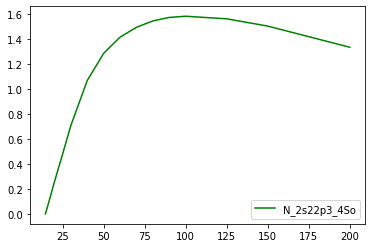

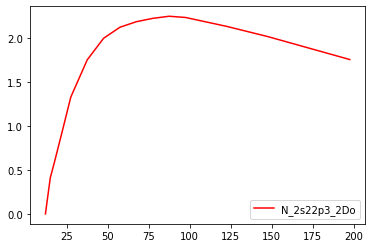

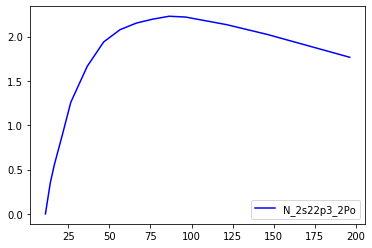

In [15]:
for i in range(0,3):
    data = pd.read_csv(arcdir + "ion_00" + str(i+1),
                       sep="\s+",
                       header=None,
                       names=["e_energy", "sigma"],
                       skiprows=1,
                       usecols=[0,1])
    data["e_energy"] = data["e_energy"]-target_states.iloc[i]["energy_bsr"]
    filename = outdir + "ionization_" + n_states[i]
    next_csdata_id = scraper.write_pd_data_to_file(data, filename + ".dat", start_csdata_id=next_csdata_id)
    next_cs_id = scraper.write_metadata_to_file(filename=filename + ".met",
                                   cs_id=next_cs_id,
                                   specie="N",
                                   process="ionization_partial",
                                   units_e=1.0,
                                   units_sigma=1.0E-20,
                                   lhs_a=n_states[i],
                                   rhs_a=np_states[0],
                                   ref="wang2014",
                                   background='From BSR calculations. Raw data provided by Zatsarinny.  Used predominate electronic state for N+ on RHS (ground state); however, there is significant 2s-ionization above 20 eV with ~15% contribution at 100 eV.')
    scraper.write_models_to_file(filename=filename + ".mod",
                                 models_array=["n_eb1"])

    x,y = data["e_energy"], data["sigma"]
    if i == 3:
        i_max = 120
        x = x[:i_max]
        y = y[:i_max]
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    plot_symbols = ["r-", "b-", "g-"]
    #plt.plot(x, y, plot_symbols[i-1], label = n_states_long[i])
    plt.plot(x, y, plot_symbols[i-1], label = n_states[i])
    plt.legend(loc='lower right');
    plt.show()

Momentum transfer
----------------------

Momentum transfer cross sections for electron impact with atomic nitrogen in the (2s$^2$2p$^3$) ${}^4S^o$ ground state, metastable (2s$^2$2p$^3$) ${}^2D^o$ state, and the metastable (2s$^2$2p$^3$) ${}^2P^o$ state.

In [16]:
for i in range(0,3):
    data = pd.read_csv(arcdir + "mt_00" + str(i+1),
                       sep="\s+",
                       header=None,
                       names=["e_energy", "sigma"],
                       skiprows=1,
                       usecols=[0,1])
    data["e_energy"] = data["e_energy"]-target_states.iloc[i]["energy_bsr"]
    filename = outdir + "momentum_transfer_" + n_states[i]
    next_csdata_id = scraper.write_pd_data_to_file(data, filename + ".dat", start_csdata_id=next_csdata_id)
    next_cs_id = scraper.write_metadata_to_file(filename=filename + ".met",
                                   cs_id=next_cs_id,
                                   specie="N",
                                   process="momentum_partial",
                                   units_e=1.0,
                                   units_sigma=1.0E-20,
                                   lhs_a=n_states[i],
                                   rhs_a=n_states[i],
                                   ref="wang2014",
                                   background='From BSR calculations. Raw data provided by Zatsarinny.')
    scraper.write_models_to_file(filename=filename + ".mod",
                                 models_array=["n_eb1"])

    
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    x,y = data["e_energy"], data["sigma"]
    plot_symbols = ["r-", "b-", "g-"]
    if i == 0:
        i_max = 300
        x = x[:i_max]
        y = y[:i_max]
        plt.loglog(x, y, plot_symbols[i-1], label = n_states_long[i])
    else:
        plt.plot(x, y, plot_symbols[i-1], label = n_states_long[i])
    plt.legend(loc='upper right');
    plt.show() 

ValueError: 
{}^4\text{S}^\text{o}
    ^
Unknown symbol: \text, found '\'  (at char 4), (line:1, col:5)

<Figure size 432x288 with 1 Axes>

ValueError: 
2s^22p^3 {}^2D^\text{o}
                 ^
Expected {snowflake | accent | symbol | c_over_c | function | group | frac | dfrac | stackrel | binom | genfrac | sqrt | overline | operatorname}, found 'e'  (at char 17), (line:1, col:18)

<Figure size 432x288 with 1 Axes>

ValueError: 
2s^22p^3 {}^2P^\text{o}
                 ^
Expected {snowflake | accent | symbol | c_over_c | function | group | frac | dfrac | stackrel | binom | genfrac | sqrt | overline | operatorname}, found 'e'  (at char 17), (line:1, col:18)

<Figure size 432x288 with 1 Axes>

Elastic Scattering
-----------

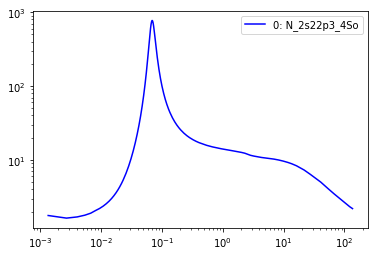

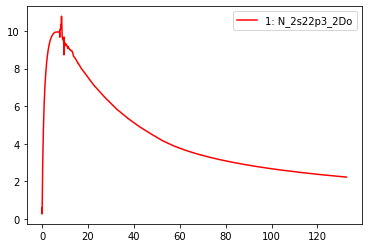

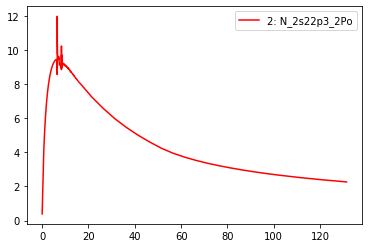

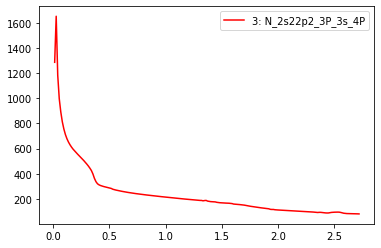

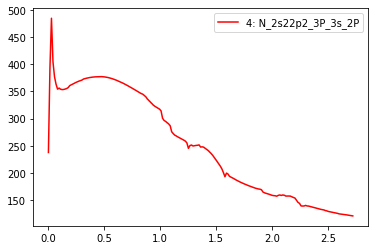

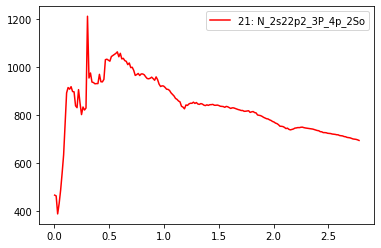

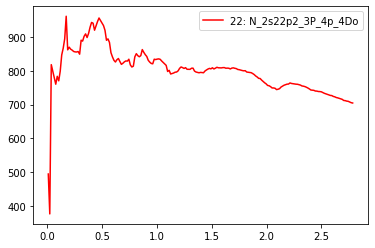

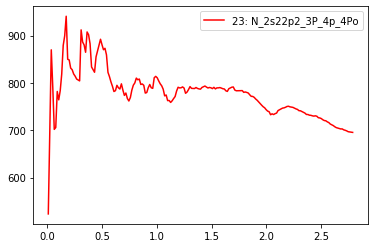

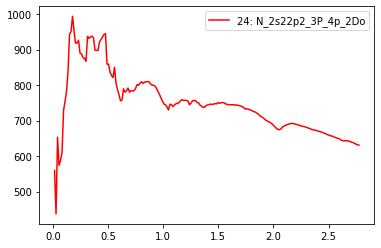

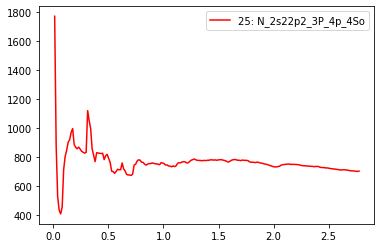

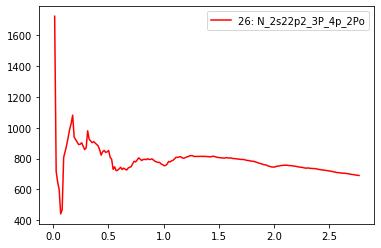

In [17]:
PLOT = True
for i in range(0,27):
    datafile = arcdir + "tr_" + '{0:03d}'.format(i+1) + "_" + '{0:03d}'.format(i+1)
    data = pd.read_csv(datafile,
                       sep="\s+",
                       header=None,
                       names=["e_energy", "sigma"],
                       skiprows=1,
                       usecols=[0,1])
    data["e_energy"] = data["e_energy"]-target_states.iloc[i]["energy_bsr"]
    filename = outdir+"elastic_" + n_states[i]
    next_csdata_id = scraper.write_pd_data_to_file(data, filename + ".dat", start_csdata_id = next_csdata_id)
    next_cs_id = scraper.write_metadata_to_file(filename=filename + ".met",
                                                cs_id=next_cs_id,
                                                specie="N",
                                                process="elastic_partial",
                                                units_e=1.0,
                                                units_sigma=1.0E-20,
                                                lhs_a=n_states[i],
                                                rhs_a=n_states[i],
                                                ref="wang2014",
                                                background='From BSR calculations. Raw data provided by Zatsarinny.')
    if i < 3:
        scraper.write_models_to_file(filename=filename + ".mod",
                                     models_array=["n_eb1"])
    
    
    if PLOT and (i < 5 or i > 20):
        #plot_label = str(i) + ": " + n_states_long[i]
        plot_label = str(i) + ": " + n_states[i]
        x,y = data["e_energy"], data["sigma"]
        fig = plt.figure()
        ax1 = fig.add_subplot(111)
        #plot_symbols = ["r-", "b-", "g-"]
        if i == 0:
            i_max = 300
            x = x[:i_max]
            y = y[:i_max]
            plt.loglog(x, y, "b-", label = plot_label)
        elif i >= 3:
            i_max = 200
            x = x[:i_max]
            y = y[:i_max]
            plt.plot(x, y, "r-", label = plot_label)
        else:
            plt.plot(x, y, "r-", label = plot_label)
        plt.legend(loc='upper right');
        plt.show() 

Excitation
-----------

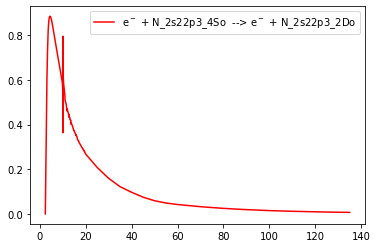

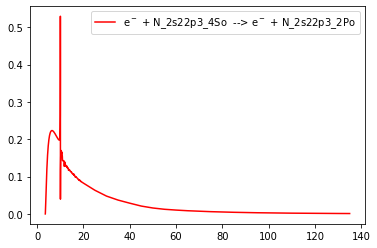

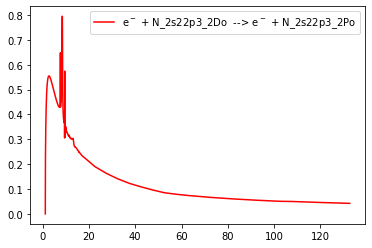

In [18]:
PLOT = True
for i in range(0,26):
    for j in range(i+1, 27):
        datafile = "_". join([arcdir + "tr", '{0:03d}'.format(i+1), '{0:03d}'.format(j+1)])
        data = pd.read_csv(datafile,
                           sep="\s+",
                           header=None,
                           names=["e_energy", "sigma"],
                           skiprows=1,
                           usecols=[0,1])
        data["e_energy"] = data["e_energy"]-target_states.iloc[i]["energy_bsr"]
        filename = "_".join([outdir + "/excitation", n_states[i], n_states[j]]) 
        next_csdata_id = scraper.write_pd_data_to_file(data, filename + ".dat", start_csdata_id=next_csdata_id)
        next_cs_id = scraper.write_metadata_to_file(filename=filename + ".met",
                                                    cs_id=next_cs_id,
                                                    specie="N",
                                                    process="excitation",
                                                    units_e=1.0,
                                                    units_sigma=1.0E-20,
                                                    lhs_a=n_states[i],
                                                    rhs_a=n_states[j],
                                                    ref="wang2014",
                                                    background='From BSR calculations. Raw data provided by Zatsarinny.')
        if i < 3 and j < 3:
            scraper.write_models_to_file(filename=filename + ".mod",
                                         models_array=["abc", "n_eb1"])
        else:
            scraper.write_models_to_file(filename=filename + ".mod", 
                                         models_array=["abc"])

        
        if PLOT and (i < 3 or i > 24) and j < 3:
            x,y = data["e_energy"], data["sigma"]
            fig = plt.figure()
            ax1 = fig.add_subplot(111)
            #plot_symbols = ["r-", "b-", "g-"]
            #if i >= 3:
            #    i_max = 200
            #    x = x[:i_max]
            #    y = y[:i_max]
            #if i== 0:
                #i_max = 150
                #x = x[:i_max]
                #y = y[:i_max]
            #    plt.loglog(x, y, "b-", label = n_states[i])
            #else:
            #plt.plot(x, y, "r-", label = " ".join(["e$^-$ +", n_states_long[i]," --> e$^-$ +", n_states_long[j]]))
            plt.plot(x, y, "r-", label = " ".join(["e$^-$ +", n_states[i]," --> e$^-$ +", n_states[j]]))
            plt.legend(loc='upper right');
            plt.show() 

In [19]:
scraper.write_next_id_to_file(next_cs_id, next_csdata_id)

In [20]:
next_cs_id, next_csdata_id

(385, 201085)

In [21]:
scraper.rmdir(tmpdir)